# Final Project

Molly Siebecker and Marley Myrianthopoulos

CUNY SPS

DATA 620

Summer 2024

# Loading the Data

In [121]:
# Import required libraries and data
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import itertools

rankings_url = "https://raw.githubusercontent.com/Marley-Myrianthopoulos/cunysps_data620/main/final/nyt_100_books_21st_century.csv"
rankings = pd.read_csv(rankings_url)
print(rankings.head())

   rank                     title            author  \
0     1       My Brilliant Friend    Elena Ferrante   
1     2  The Warmth of Other Suns  Isabel Wilkerson   
2     3                 Wolf Hall     Hilary Mantel   
3     4           The Known World   Edward P. Jones   
4     5           The Corrections  Jonathan Franzen   

                                               blurb   author_blurb  \
0  The first volume of what would become Ferrante...            NaN   
1  Wilkerson’s intimate, stirring, meticulously r...  Dwight Garner   
2  It was hard choosing the books for my list, bu...   Lev Grossman   
3  This novel, about a Black farmer, bootmaker an...  Dwight Garner   
4  With its satirical take on mental health, self...            NaN   

                                    additional_blurb author_additional_blurb  
0                                                NaN                     NaN  
1                                                NaN                     NaN  
2    

In [122]:
ballots_url = "https://raw.githubusercontent.com/Marley-Myrianthopoulos/cunysps_data620/main/final/nyt_100_books_ballots.csv"
ballots = pd.read_csv(ballots_url)
print(ballots.head())

                 voter profession                       book_1  \
0         Stephen King     author                    Atonement   
1          Min Jin Lee     author  All the Light We Cannot See   
2  Karl Ove Knausgaard     author                         2666   
3        Bonnie Garmus     author     Between the World and Me   
4    Curtis Sittenfeld     author           The Line of Beauty   

            author_1                         book_2            author_2  \
0         Ian McEwan                Christine Falls      Benjamin Black   
1      Anthony Doerr  Behind the Beautiful Forevers       Katherine Boo   
2     Roberto Bolano                  The Argonauts       Maggie Nelson   
3   Ta-Nehisi Coates               Demon Copperhead  Barbara Kingsolver   
4  Alan Hollinghurst                    A Lucky Man      Jamel Brinkley   

                    book_3        author_3                   book_4  \
0            The Goldfinch     Donna Tartt                Gone Girl   
1         

# Data Transformation

In [123]:
print("Columns in DataFrame:", ballots.columns.tolist())


Columns in DataFrame: ['voter', 'profession', 'book_1', 'author_1', 'book_2', 'author_2', 'book_3', 'author_3', 'book_4', 'author_4', 'book_5', 'author_5', 'book_6', 'author_6', 'book_7', 'author_7', 'book_8', 'author_8', 'book_9', 'author_9', 'book_10', 'author_10']


In [124]:
voter_to_book = ballots[['voter', 'profession', 'book_1', 'book_2', 'book_3', 'book_4', 'book_5', 'book_6', 'book_7', 'book_8', 'book_9', 'book_10']]

In [125]:
voter_to_book_long = pd.melt(voter_to_book, 
                  id_vars=['voter', 'profession'], 
                  value_vars=['book_1', 'book_2', 'book_3', 'book_4', 'book_5', 'book_6', 'book_7', 'book_8', 'book_9', 'book_10'],
                  var_name='vote_number',
                  value_name='book')
print(voter_to_book_long.head())


                 voter profession vote_number                         book
0         Stephen King     author      book_1                    Atonement
1          Min Jin Lee     author      book_1  All the Light We Cannot See
2  Karl Ove Knausgaard     author      book_1                         2666
3        Bonnie Garmus     author      book_1     Between the World and Me
4    Curtis Sittenfeld     author      book_1           The Line of Beauty


In [126]:
print(voter_to_book_long.tail())

               voter profession vote_number                         book
505     Michael Roth     author     book_10  A Visit From the Goon Squad
506     Ryan Holiday     author     book_10                    Tunnel 29
507   Stephanie Land     author     book_10                   Strung Out
508  Douglas Preston     author     book_10                          NaN
509       Mary Roach     author     book_10                          NaN


In [127]:
voter_to_author = ballots[['voter', 'profession', 'author_1', 'author_2', 'author_3', 'author_4', 'author_5', 'author_6', 'author_7', 'author_8', 'author_9', 'author_10']]

In [128]:
voter_to_author_long = pd.melt(voter_to_author, 
                  id_vars=['voter', 'profession'], 
                  value_vars=['author_1', 'author_2', 'author_3', 'author_4', 'author_5', 'author_6', 'author_7', 'author_8', 'author_9', 'author_10'],
                  var_name='vote_number',
                  value_name='author')
print(voter_to_author_long.head())

                 voter profession vote_number             author
0         Stephen King     author    author_1         Ian McEwan
1          Min Jin Lee     author    author_1      Anthony Doerr
2  Karl Ove Knausgaard     author    author_1     Roberto Bolano
3        Bonnie Garmus     author    author_1   Ta-Nehisi Coates
4    Curtis Sittenfeld     author    author_1  Alan Hollinghurst


In [129]:
voter_author_edges = voter_to_author_long[['voter', 'author']]

voter_book_edges = voter_to_book_long[['voter', 'book']]

In [130]:
voter_author_edges['weight'] = voter_author_edges.groupby(['voter', 'author'])['author'].transform('count')
voter_author_edges = voter_author_edges.drop_duplicates()
print(voter_author_edges)

                   voter             author  weight
0           Stephen King         Ian McEwan     1.0
1            Min Jin Lee      Anthony Doerr     1.0
2    Karl Ove Knausgaard     Roberto Bolano     1.0
3          Bonnie Garmus   Ta-Nehisi Coates     1.0
4      Curtis Sittenfeld  Alan Hollinghurst     1.0
..                   ...                ...     ...
504       Morgan Jerkins                NaN     NaN
505         Michael Roth      Jennifer Egan     1.0
506         Ryan Holiday    Helena Merriman     1.0
507       Stephanie Land          Erin Khar     1.0
509           Mary Roach                NaN     NaN

[500 rows x 3 columns]


/var/folders/h2/6wvcm3lx18dbzjmy88ryn0g80000gn/T/ipykernel_36518/2594005578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voter_author_edges['weight'] = voter_author_edges.groupby(['voter', 'author'])['author'].transform('count')


In [131]:
print(voter_author_edges[voter_author_edges.weight > 1])

                          voter           author  weight
22   Thomas Chatterton Williams   Roberto Bolano     3.0
178                 Scott Turow   Elena Ferrante     4.0
253             Douglas Preston    Hampton Sides     2.0
261    Nana Kwame Adjei‑Brenyah  George Saunders     2.0
282     Honoree Fanonne Jeffers    Toni Morrison     2.0
328  Thomas Chatterton Williams      Rachel Cusk     2.0


In [132]:
voter_author_edges = voter_author_edges.dropna()

voter_book_edges = voter_book_edges.dropna()

# Network Analysis

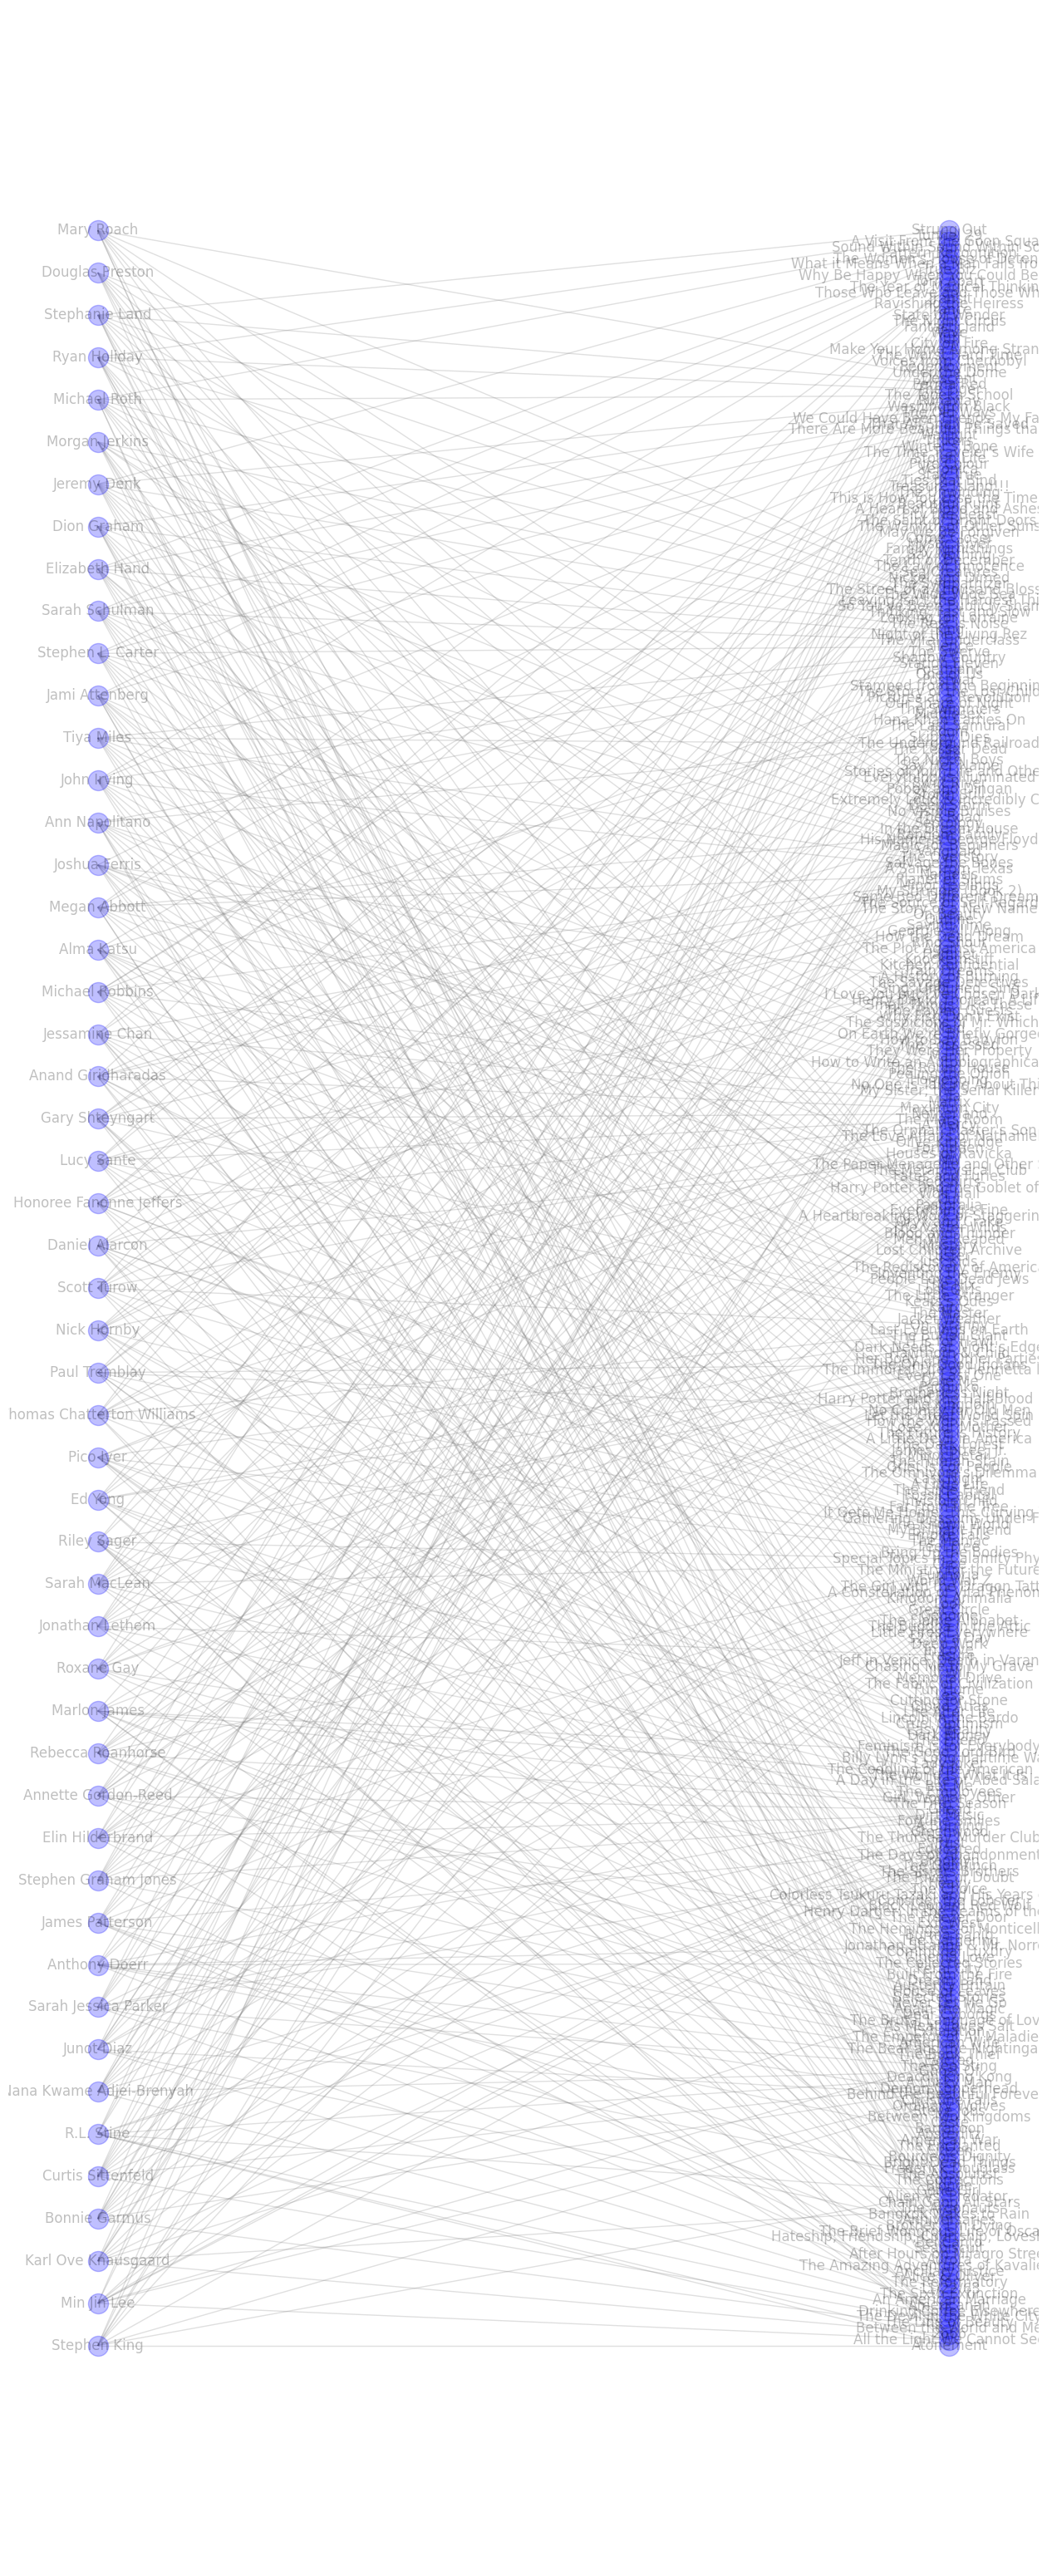

In [133]:
# Get a list of each type of node and the edges for the graph
voters = voter_book_edges['voter'].unique()
books =voter_book_edges['book'].unique()
edges = list(voter_book_edges.itertuples(index=False, name=None))

# Add graph elements
B = nx.Graph()
B.add_nodes_from(voters, bipartite=0)
B.add_nodes_from(books, bipartite=1)
B.add_edges_from(edges)

# Create the graph
pos = nx.drawing.layout.bipartite_layout(B, voter_book_edges['voter'])
plt.figure(figsize = (16, 40))
plt.tight_layout()
plt.axis("off")
nx.draw_networkx(B, node_color = 'blue', edge_color = 'gray', alpha = 0.25, pos = pos)

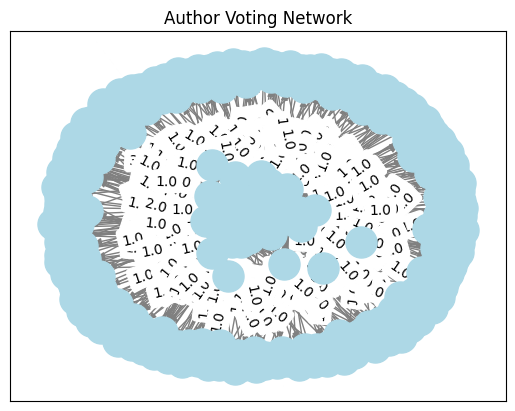

In [134]:
# initializes graph
graph = nx.DiGraph()


# adds edges to the graph
for index, row in voter_author_edges.iterrows():
    graph.add_edge(row['voter'], row['author'], weight=row['weight'])

# Draw graph with weights
pos = nx.spring_layout(graph)
edges = graph.edges(data=True)

# Draw nodes
nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=500)

# Draw edges with weights
nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color='gray')
nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): d['weight'] for u, v, d in edges})

# Draw node labels
#nx.draw_networkx_labels(graph, pos)

plt.title('Author Voting Network')
plt.show()

# Text Analysis

In [135]:
import nltk
from nltk.corpus import opinion_lexicon
import re

In [136]:
test_string = "happy, free, confused, and lonely at the same time. taylor's version"

lowercase_string = ' '.join(word.lower() for word in test_string.split())

pattern_alpha_apos = re.compile(r"\b[a-z']+\b")

test_words = re.findall(pattern_alpha_apos, lowercase_string)
print(test_words)

['happy', 'free', 'confused', 'and', 'lonely', 'at', 'the', 'same', 'time', "taylor's", 'version']


In [137]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())


In [138]:
positive_count = sum(1 for word in test_words if word.lower() in positive_words)
negative_count = sum(1 for word in test_words if word.lower() in negative_words)
total_count = sum(1 for word in test_words)

In [139]:
if positive_count > negative_count:
    sentiment = "Positive"
elif negative_count > positive_count:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

In [140]:
percent_positive = round(positive_count / total_count * 100, 2)

In [141]:
print(f"Sentiment: {sentiment}")
print(f"Positive words: {positive_count}")
print(f"Negative words: {negative_count}")
print(f"Percent positive: {percent_positive}")

Sentiment: Neutral
Positive words: 2
Negative words: 2
Percent positive: 18.18


In [142]:
def get_word_list(text):
    lowercase_text = ' '.join(word.lower() for word in text.split())
    return re.findall(pattern_alpha_apos, lowercase_text)

def count_positive(text):
    return sum(1 for word in text if word.lower() in positive_words)

count_positive(test_words)

2

In [145]:
blurbs = rankings.drop(['author_blurb', 'author_additional_blurb'], axis = 1)
blurbs_long = pd.melt(blurbs, id_vars = ['rank', 'title', 'author'],
                      value_vars = ['blurb', 'additional_blurb'],
                      var_name = 'text').sort_values(by = 'rank').drop(['text'], axis = 1).dropna()

print(blurbs_long.head(10))

     rank                     title            author  \
0       1       My Brilliant Friend    Elena Ferrante   
1       2  The Warmth of Other Suns  Isabel Wilkerson   
2       3                 Wolf Hall     Hilary Mantel   
3       4           The Known World   Edward P. Jones   
4       5           The Corrections  Jonathan Franzen   
104     5           The Corrections  Jonathan Franzen   
5       6                      2666    Roberto Bolano   
6       7  The Underground Railroad  Colson Whitehead   
7       8                Austerlitz       W.G. Sebald   
8       9           Never Let Me Go    Kazuo Ishiguro   

                                                 value  
0    The first volume of what would become Ferrante...  
1    Wilkerson’s intimate, stirring, meticulously r...  
2    It was hard choosing the books for my list, bu...  
3    This novel, about a Black farmer, bootmaker an...  
4    With its satirical take on mental health, self...  
104  Sometimes we have a totem

In [149]:
blurbs_long['filtered_blurb'] = blurbs_long['value'].apply(get_word_list)
blurbs_long['positive_words'] = blurbs_long['filtered_blurb'].apply(count_positive)
print(blurbs_long.head(10))

     rank                     title            author  \
0       1       My Brilliant Friend    Elena Ferrante   
1       2  The Warmth of Other Suns  Isabel Wilkerson   
2       3                 Wolf Hall     Hilary Mantel   
3       4           The Known World   Edward P. Jones   
4       5           The Corrections  Jonathan Franzen   
104     5           The Corrections  Jonathan Franzen   
5       6                      2666    Roberto Bolano   
6       7  The Underground Railroad  Colson Whitehead   
7       8                Austerlitz       W.G. Sebald   
8       9           Never Let Me Go    Kazuo Ishiguro   

                                                 value  \
0    The first volume of what would become Ferrante...   
1    Wilkerson’s intimate, stirring, meticulously r...   
2    It was hard choosing the books for my list, bu...   
3    This novel, about a Black farmer, bootmaker an...   
4    With its satirical take on mental health, self...   
104  Sometimes we have a